## 4.1 Run ridge regression, choose the best $\lambda$

In [45]:
# import necessary modules
from setup_problem import load_problem
from ridge_regression import *
import pandas as pd 
import math 
import matplotlib.pyplot as plt

In [46]:
lasso_data_fname = "lasso_data.pickle"
x_train, y_train, x_val, y_val, target_fn, coefs_true, featurize = load_problem(lasso_data_fname)

""" 
4.1.1. Run ridge regression on the provided training dataset.  Choose the λ that minimizes
the empirical risk (i.e.  the average square loss) on the validation set.  Include
a table of the parameter values you tried and the validation performance for each. (10 points) 
"""
## to do
l2_list = [1e-7,1e-5,1e-4,1e-3,5e-3,1e-2,0.05,0.1,0.5,1,10]
er_list = []
for i in l2_list:
    
    Ridge = RidgeRegression(l2reg=i)
    # Generate features
    X_train = featurize(x_train)
    X_val = featurize(x_val)

#     print(np.shape(X_train))
    Ridge.fit(X_train,y_train)

    error = Ridge.score(X_val,y_val)
    er_list.append(error)

result = pd.DataFrame(list(zip(l2_list,er_list)),columns = ['l2 params', 'mse'])
min_index = er_list.index(min(er_list))
print("best l2 param:{}".format(l2_list[min_index]))

result

best l2 param:0.005


,l2 params,mse
0,1.000000e-07,0.142624
1,1.000000e-05,0.141880
2,1.000000e-04,0.136683
3,1.000000e-03,0.123424
4,5.000000e-03,0.120040
5,1.000000e-02,0.120759
6,5.000000e-02,0.127115
7,1.000000e-01,0.132305
8,5.000000e-01,0.167989
9,1.000000e+00,0.202270


<ipython-input-47-a175bcb9b291>:14: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


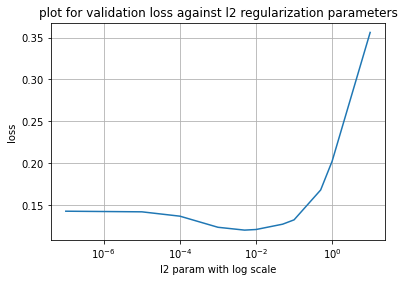

In [47]:
"""
4.1.2. Also include a plot of the results (Validation loss against l2 regularization parameters)
(5 points) 
Hint: you may want to use a log scale for the x axis
"""
## to do
# take log scale for x axis
fig,ax = plt.subplots()
ax.semilogx(l2_list,er_list)
ax.grid()
ax.set_title("plot for validation loss against l2 regularization parameters")
ax.set_xlabel("l2 param with log scale")
ax.set_ylabel("loss")
fig.show()

## 4.2 Visualize the prediction functions

[0.         0.001      0.00151132 ... 0.99889367 0.999      0.9999867 ]
[ 5.49256805e-01  5.67069229e-01  3.85457145e-03  5.91120701e-02
 -2.37770318e+00  3.86695165e-02  8.30023741e-01 -1.74901668e+00
  1.62668014e-01 -6.50882637e-02  4.08928570e-01  1.07089095e+00
  2.36285798e-01  1.73024257e-01  5.53354948e-01  1.71304821e-01
  7.07099942e-01  2.69433098e-01  5.10768967e-01  1.20053185e-01
  5.98146429e-01 -1.32178980e-01  2.78659809e-01  6.35950078e-01
 -2.47733482e-01 -3.22197789e-01 -3.20708749e-01  7.09134858e-02
 -1.52493599e-01  3.99835228e-01  5.72607682e-01  1.88011596e-01
  1.13851620e+00 -1.09497681e-01  5.96906047e-01  2.63015359e-01
 -1.38854699e+00 -6.69984528e-02  3.33571088e-01 -6.07383882e-01
  3.05115687e-01  9.51278748e-01  7.46753635e-02  4.34579286e-01
  5.24195380e-01  1.22648785e-01  6.93536314e-02  3.65558514e-01
 -2.44244538e-01  2.86242398e-01  3.40866434e-01  3.98248421e-01
 -6.44993456e-01  1.02277490e-01 -1.33737037e+00  1.87463204e-01
  3.41295134e-01  

<ipython-input-48-613309d5aa33>:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


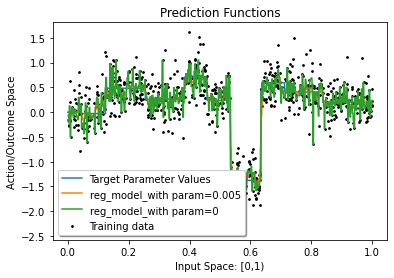

In [48]:
""" 
4.2 Now we want to visualize the prediction functions.  On the same axes, plot the following:
the training data, the target function, an unregularized least squares fit (still using the 
featurized data),and the prediction function chosen in the previous problem. (5 points) 
Hint: you may find plot_prediction_functions() from ridge_regression module useful
"""

# initialize a model with the λ chosen in 4.1, fit the model

pred_fns = []
x = np.sort(np.concatenate([np.arange(0,1,.001), x_train]))
X = featurize(x)
pred_fns.append({"name":"Target Parameter Values", "coefs":coefs_true, "preds": target_fn(x) })
new_reg_model = RidgeRegression(l2reg=0.005)
new_X_train = featurize(x_train)
new_reg_model.fit(new_X_train,y_train)

pred1 = new_reg_model.predict(X)
dict1 = {"name":"reg_model_with param=0.005","preds":pred1,"coefs":new_reg_model.w_}
pred_fns.append(dict1)

# initialize a model without regularization, fit the model
non_reg_model = RidgeRegression(l2reg=0)
non_reg_model.fit(new_X_train,y_train)
pred2 = non_reg_model.predict(X)
dict2 =  {"name":"reg_model_with param=0","preds":pred2,"coefs":non_reg_model.w_}
pred_fns.append(dict2)

# Plot the training data, the target function, an unregularized least square fit, 
# the prediction function chosen in 4.1
## to do
print(x)
print(y_train)
f = plot_prediction_functions(x,pred_fns,x_train,y_train,legend_loc="best")
f.show()

<ipython-input-49-e3c7666eb40b>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


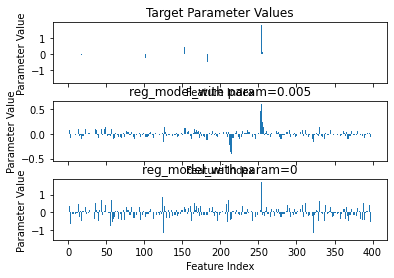

In [49]:
""" 
Next, along the lines of the bar charts produced by the code in compare_parameter_vectors, 
visualize the coefficients for each of the prediction functions plotted, including the target 
function. (5 points) 
Hint: you may find compare_parameter_vectors() from ridge_regression module useful
"""
## to do
f = compare_parameter_vectors(pred_fns)
f.show()


In [50]:
print(np.argmax(np.abs(coefs_true),np.max(np.abs(coefs_true))))
print(np.argmax(np.abs(non_reg_model.w_),np.max(np.abs(non_reg_model.w_))))
print(np.argmax(np.abs(new_reg_model.w_),np.max(np.abs(new_reg_model.w_))))

TypeError: 'numpy.float64' object cannot be interpreted as an integer

""" 
Describe the patterns, including the scale of the coefficients, as well as which coefficients 
have the most weight (5 points) 
"""

The coefficient of the target function are very sparse. The unregularized square fit is more sparse than the target function. The coefficients of ridge regression whose lambda is 0.05 are very dense. This is because any parameter in ridge regression can hardly become zero. 
I tried to figure out the coefficients with the most weight.
It seems that for all of the three cases, the 254th parameters have the most weight.
However, the approach to find the value of the parameters failed. The code is in the above code block.